## **Correlação entre gastos com saúde e melhora do sistema**

## Verificou-se que aumentar os gastos melhora o sistema, mas os retornos são decrescentes.

## Bibliotecas utilizadas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
import gspread

In [2]:
import plotly.express as px
import plotly.graph_objects as go

## Carregando os dados que já estão organizados em uma planilha

In [4]:
url = "https://docs.google.com/spreadsheets/d/1nPQZP1p-tU3Iw7gLDRQUBV7X1aQSioqw36EOU-fW8Z0/export?format=csv"
df = pd.read_csv(url)

In [5]:
df.head()

,country,index1,gméd1,gméd%1,Unnamed: 4,index,gméd,gméd%
0,United States,"72,7","15,57583427","15,58",NaN,72.7,15.575834,15.58
1,Sierra Leone,"39,1","11,73723993","11,74",NaN,39.1,11.737240,11.74
2,France,"80,4","10,84335114","10,84",NaN,80.4,10.843351,10.84
3,Germany,"81,1","10,81132952","10,81",NaN,81.1,10.811330,10.81
4,Switzerland,"82,4","10,31888635","10,32",NaN,82.4,10.318886,10.32


## Fazendo uns ajustes finais antes de trabalhar os dados

In [6]:
#quero apenas as colunas country, gméd, gméd%
df = df[['country', 'index', 'gméd%']]

In [7]:
df.head()

,country,index,gméd%
0,United States,72.7,15.58
1,Sierra Leone,39.1,11.74
2,France,80.4,10.84
3,Germany,81.1,10.81
4,Switzerland,82.4,10.32


In [8]:
# Converter os tipos de dados para os corretos
df['index'] = df['index'].astype(float)
df['gméd%'] = df['gméd%'].astype(float)

## Veja como ficou:

In [9]:
df.head()

,country,index,gméd%
0,United States,72.7,15.58
1,Sierra Leone,39.1,11.74
2,France,80.4,10.84
3,Germany,81.1,10.81
4,Switzerland,82.4,10.32


## A seguir, vou começar a trabalhar os dados.



---



## Vou criar um mapa para visualizar algumas coisas interessantes:

## 1- Melhores sistemas de saúde do mundo:

In [10]:
# Create the choropleth map
fig_map = px.choropleth(
    df,
    locations="country",
    locationmode="country names",
    color="index",
    color_continuous_scale="Rainbow",
    range_color=(0, 100),
    title='Melhores Sistemas de Saúde',
    labels={'index':'Qualidade do Sistema de Saúde'},
    hover_name="country"
)

# Customize the layout
fig_map.update_layout(
    geo_scope='world',
    geo_showframe=False,
    geo_showcoastlines=True,
    geo_coastlinecolor='darkgray',
    geo_countrycolor='darkgray'
)

# Display the map
fig_map.show()

## Os melhores sistemas estão nos países mais ricos. Sobretudo nos europeus e no Japão.

In [ ]:
# Salva o gráfico como um arquivo HTML
fig_map.write_html("/content/grafico_interativo-saúde_map.html")
from google.colab import files
files.download('/content/grafico_interativo-saúde_map.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Gráfico do percentual de gastos em relação ao PIB com saúde

In [11]:
fig_map0 = px.choropleth(
    df,
    locations="country",
    locationmode="country names",
    color="gméd%",
    color_continuous_scale="thermal",
    range_color=(0, 20),
    title="Gastos em saúde (% do PIB) por país",
    labels={"gméd%": "Qualidade do Sistema de Saúde"},
    hover_name="country"
)

# Personalize o layout
fig_map0.update_layout(
    geo_scope="world",
    geo_showframe=False,
    geo_showcoastlines=True,
    geo_coastlinecolor="darkgray",
    geo_countrycolor="darkgray",
    coloraxis_colorbar=dict(title="Percentual do PIB")
)

# Exiba o mapa
fig_map0.show()

In [ ]:
# Salva o gráfico como um arquivo HTML
fig_map0.write_html("/content/grafico_interativo-Gastos_map.html")
from google.colab import files
files.download('/content/grafico_interativo-Gastos_map.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>



---



## Verificar umas estatísticas descritivas básicas para me familiarizar com os dados:

## Dados gerais da amostra:

In [34]:
# Análise descritiva das variáveis
df.describe()

,index,gméd%
count,161.000000,161.000000
mean,54.165839,6.049503
std,16.636023,2.375571
min,13.100000,1.160000
25%,40.600000,4.270000
50%,54.600000,5.590000
75%,65.800000,8.020000
max,83.800000,15.580000


## Distribuição da qualidade:

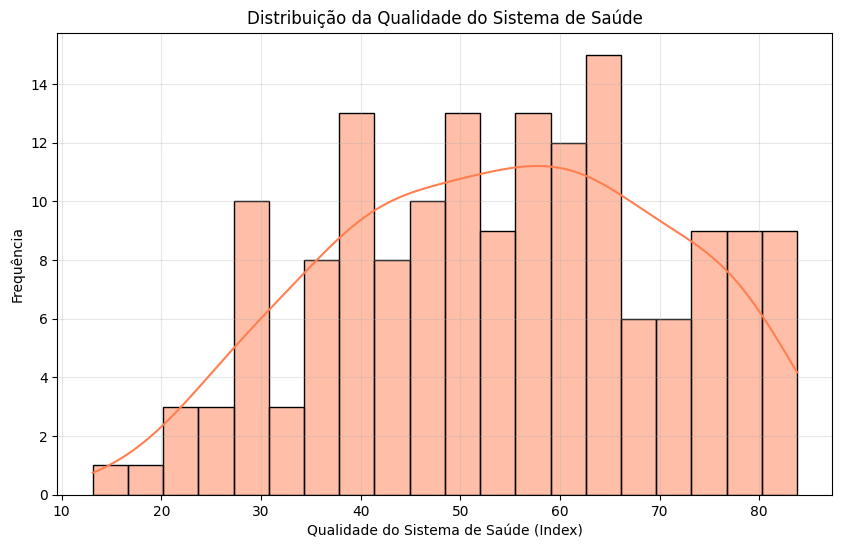

In [55]:
# Histograma da qualidade do sistema de saúde (index)
plt.figure(figsize=(10, 6))
sns.histplot(df['index'], bins=20, kde=True, color='coral')
plt.title('Distribuição da Qualidade do Sistema de Saúde')
plt.xlabel('Qualidade do Sistema de Saúde (Index)')
plt.ylabel('Frequência')
plt.grid(True, alpha=0.3)
plt.show()

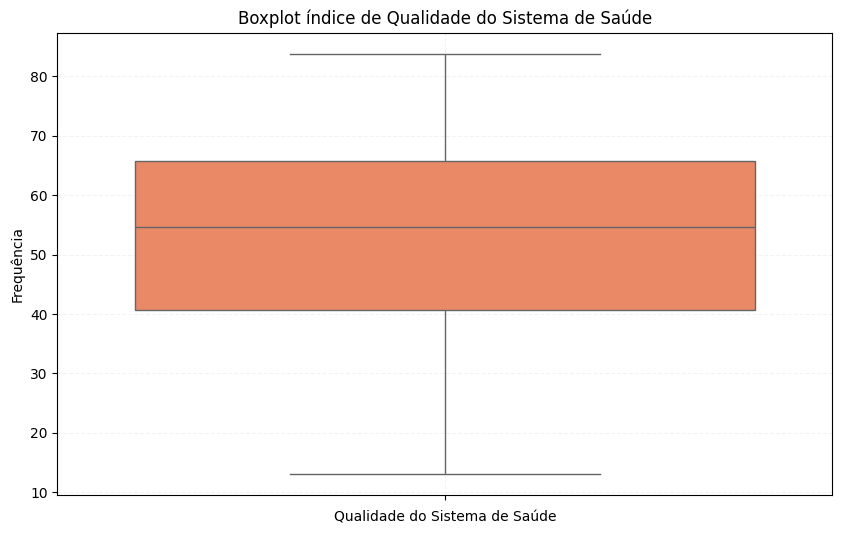

In [70]:
# Boxplot das variáveis para visualização de outliers
plt.figure(figsize=(10, 6))
sns.boxplot(y='index', data=df, color='coral')
plt.title('Boxplot índice de Qualidade do Sistema de Saúde')
plt.xlabel('Qualidade do Sistema de Saúde')
plt.ylabel('Frequência')
plt.grid(True, alpha=0.05, linestyle = '--', color = 'black')
plt.show()

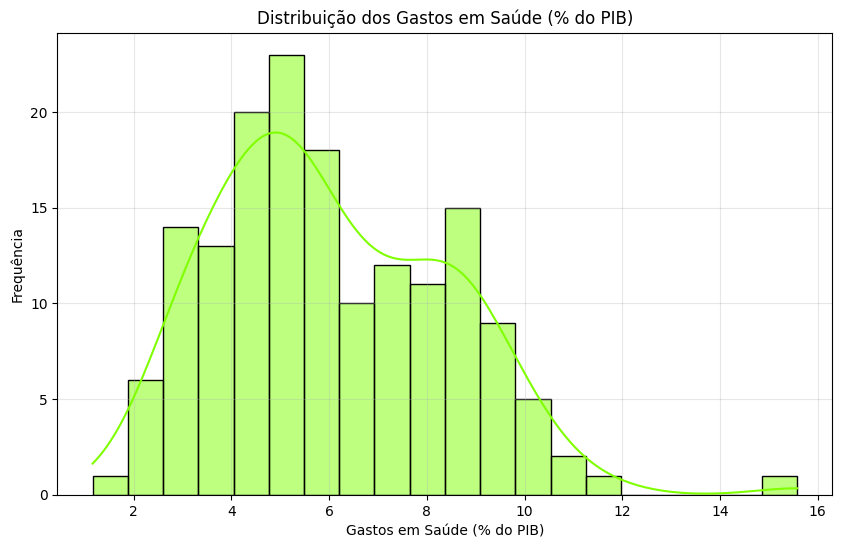

In [56]:
# Histograma dos gastos como percentual do PIB (gméd%)
plt.figure(figsize=(10, 6))
sns.histplot(df['gméd%'], bins=20, kde=True, color='chartreuse')
plt.title('Distribuição dos Gastos em Saúde (% do PIB)')
plt.xlabel('Gastos em Saúde (% do PIB)')
plt.ylabel('Frequência')
plt.grid(True, alpha=0.3)
plt.show()

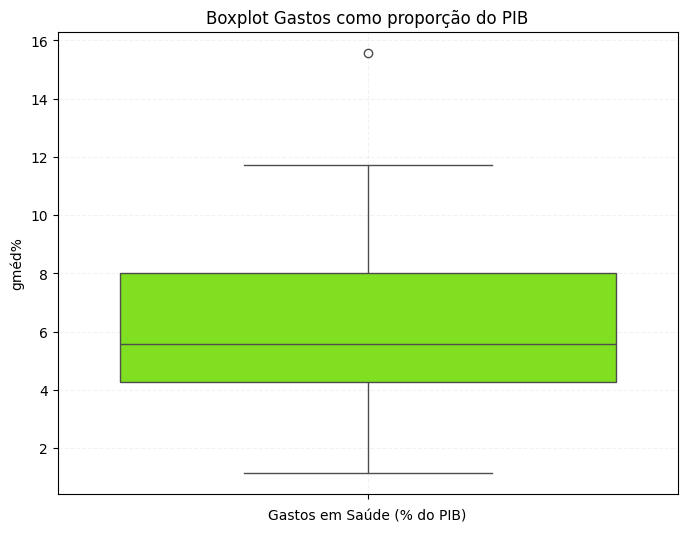

In [71]:
# Boxplot das variáveis para visualização de outliers
plt.figure(figsize=(8, 6))
sns.boxplot(y='gméd%', data=df, color='chartreuse')
plt.title('Boxplot Gastos como proporção do PIB')
plt.xlabel('Gastos em Saúde (% do PIB)')
plt.grid(True, alpha=0.05, linestyle = '--', color = 'black')
plt.show()

## Esse outlier observado são os EUA.

## Veja:

In [72]:
#vou escrever os 5 maiores gastos
print(df.nlargest(5, 'gméd%'))

         country  index  gméd%
0  United States   72.7  15.58
1   Sierra Leone   39.1  11.74
2         France   80.4  10.84
3        Germany   81.1  10.81
4    Switzerland   82.4  10.32


In [78]:
#veja os 5 piores com menos gastos
print(df.nsmallest(5, 'gméd%'))

               country  index  gméd%
160        South Sudan   13.1   1.16
159              Libya   54.3   2.10
158  Equatorial Guinea   40.6   2.20
157   Papua New Guinea   38.4   2.42
156              Syria   50.1   2.44




---



---



## Estudo da correlação

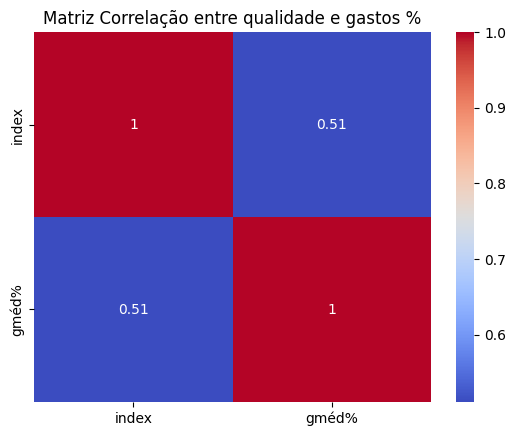

In [12]:
# matriz correlação entre colunas index e gméd%
corr0 = df[['index', 'gméd%']].corr()
#gráfico da matriz correlação
sns.heatmap(corr0, annot=True, cmap='coolwarm')
plt.title('Matriz Correlação entre qualidade e gastos %')
plt.show()

## Veja que a correlação linear entre gastos e qualidade do sistema é de 51%. Indicando correlação de moderada à forte.

## Vejamos isso em um gráfico:

## Dispersão qualidade do sistema vs. gastos

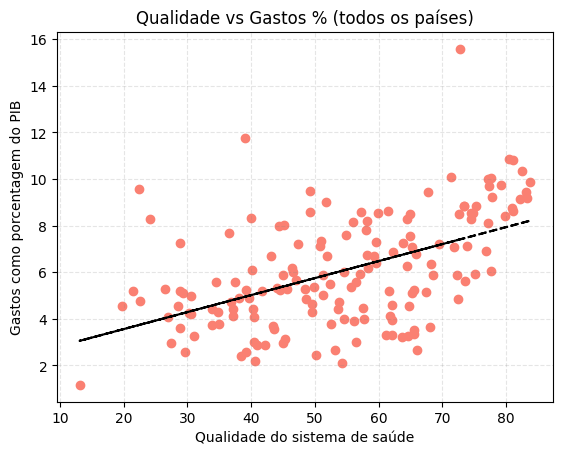

In [92]:
## colocar uma dispersão de index vs gméd%
plt.scatter(df['index'], df['gméd%'], c = 'salmon')
plt.xlabel('Qualidade do sistema de saúde')
plt.ylabel('Gastos como porcentagem do PIB')
plt.title('Qualidade vs Gastos % (todos os países)')
plt.grid(True, alpha = 0.2, linestyle ='--', color = 'gray')

#colocar uma linha de tendência
z = np.polyfit(df['index'], df['gméd%'], 1)
p = np.poly1d(z)
plt.plot(df['index'], p(df['index']), linestyle = '--', color='black')
plt.show()

## Média de gastos como percentual do PIB da amostra

In [14]:
#calcular a média de gméd%
media_gméd = df['gméd%'].mean()
media_gméd

6.0495031055900625

## Países com gastos acima da média mundial:

In [15]:
#listar os países com gastos acima da média
paises_acima = df[df['gméd%'] > media_gméd]
paises_acima

,country,index,gméd%
0,United States,72.7,15.58
1,Sierra Leone,39.1,11.74
2,France,80.4,10.84
3,Germany,81.1,10.81
4,Switzerland,82.4,10.32
...,...,...,...
64,Lithuania,68.2,6.36
65,Cyprus,64.5,6.26
66,Poland,58.4,6.18
67,Ecuador,46.4,6.17


## Gráfico dos países com gastos acima da média

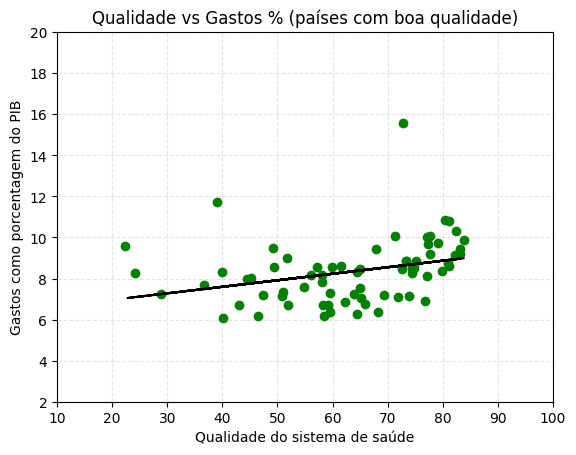

In [93]:
#visualizar em um gráfico
plt.scatter(paises_acima['index'], paises_acima['gméd%'], c = 'green')
plt.xlabel('Qualidade do sistema de saúde')
plt.ylabel('Gastos como porcentagem do PIB')
plt.title('Qualidade vs Gastos % (países com boa qualidade)')
plt.grid(True, alpha = 0.2, linestyle ='--', color = 'gray')
plt.xlim(10, 100)
plt.ylim(2, 20)

#tendencia
z = np.polyfit(paises_acima['index'], paises_acima['gméd%'], 1)
p = np.poly1d(z)
plt.plot(paises_acima['index'], p(paises_acima['index']), linestyle = '--', color='black')
plt.show()

In [26]:
#calcular a média do index
media_index0 = df['index'].mean()
media_index0

54.165838509316764

In [27]:
#listar os países acima da média em index
paises_a_index0 = df[df['index'] > media_index0]
paises_a_index0

,country,index,gméd%
0,United States,72.7,15.58
2,France,80.4,10.84
3,Germany,81.1,10.81
4,Switzerland,82.4,10.32
5,Canada,71.3,10.08
...,...,...,...
142,Kazakhstan,64.6,3.26
144,Kuwait,63.6,3.20
147,Azerbaijan,56.4,3.01
153,Qatar,66.0,2.66


In [28]:
media_index1 = paises_a_index0['index'].mean()
media_index1

67.68072289156628

In [29]:
# calcular a média index dos países de paises_a_index0
paises_a_index1 = paises_a_index0[paises_a_index0['index'] > media_index1]
paises_a_index1['index'].mean()

75.83157894736841

In [30]:
paises_a_index1

,country,index,gméd%
0,United States,72.7,15.58
2,France,80.4,10.84
3,Germany,81.1,10.81
4,Switzerland,82.4,10.32
5,Canada,71.3,10.08
6,Cuba,77.6,10.06
7,Austria,77.1,10.01
8,Belgium,83.8,9.87
9,Denmark,79.1,9.74
10,Netherlands,77.3,9.68


## Mas veja, que quando comparado com os melhores, estamos um pouco abaixo da média

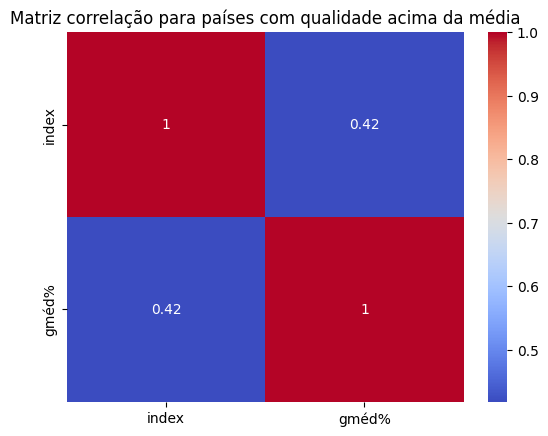

In [31]:
#calcular a correlação entre index e gméd% para os paises_a_media
corr1 = paises_a_index1[['index', 'gméd%']].corr()
#gráfico da matriz de correlação
sns.heatmap(corr1, annot=True, cmap='coolwarm')
plt.title('Matriz correlação para países com qualidade acima da média')
plt.show()

In [32]:
#media de qualidade dos paises acima
media_index2 = paises_a_index1['index'].mean()
paises_a_index2 = paises_a_index0[paises_a_index0['index'] > media_index2]
paises_a_index2


,country,index,gméd%
2,France,80.4,10.84
3,Germany,81.1,10.81
4,Switzerland,82.4,10.32
6,Cuba,77.6,10.06
7,Austria,77.1,10.01
8,Belgium,83.8,9.87
9,Denmark,79.1,9.74
10,Netherlands,77.3,9.68
14,Sweden,83.1,9.43
15,United Kingdom,77.7,9.21


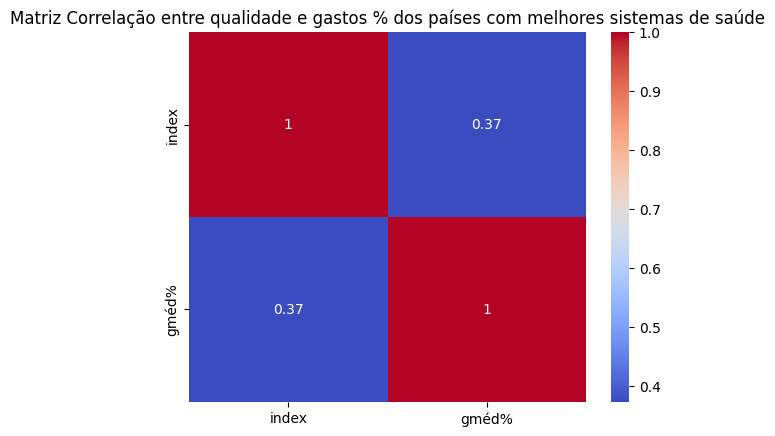

In [33]:
corr2 = paises_a_index2[['index', 'gméd%']].corr()
sns.heatmap(corr2, annot=True, cmap='coolwarm')
plt.title('Matriz Correlação entre qualidade e gastos % dos países com melhores sistemas de saúde')
plt.show()

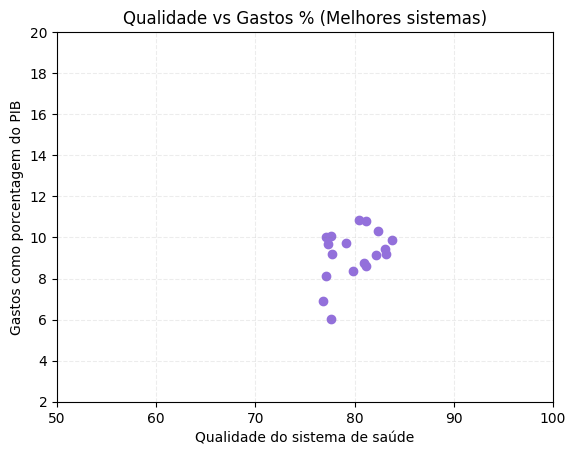

In [97]:
#vou colocar em um gráfico os paises_a_index2
#visualizar em um gráfico
plt.scatter(paises_a_index2['index'], paises_a_index2['gméd%'], c = 'mediumpurple')
plt.xlabel('Qualidade do sistema de saúde')
plt.ylabel('Gastos como porcentagem do PIB')
plt.title('Qualidade vs Gastos % (Melhores sistemas)')
plt.grid(True, alpha = 0.15, linestyle ='--', color = 'gray')
plt.xlim(50, 100)
plt.ylim(2, 20)
plt.show()

## Veja que os dados estão dispersões sem um padrão muito exato agora. Esse padrão difere completamente do gráfico inicial da amostra que mostrava evidente relação positiva entre gastos e qualidade.



---



## Conclusão:

## Acorrelação entre gastos e qualidade diminui para os melhores sistemas de saúde do mundo. Indicando que gastos e qualidade têm a ver, mas os retornos sobre a qualidade são cada vez menores conforme aumentamos a qualidade dos sistemas.
## Na economia, chamamos esse fenômeno de Rendimentos Marginais Decrescentes. Ou seja, os retornos do aumento de gastos com saúde diminuem conforme os países apresentam sistemas de saúde mais desenvolvidos. Dessa forma, países com sistemas de saúde mais desenvolvidos precisam focar mais em eficiência e qualidade que na quantidade de gastos!


## Mais pra frente, vou estudar a relação entre os piores países e verificar a correlação.